In [128]:
import pandas as pd
import numpy as np
import ppscore as pps
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [129]:
df = pd.read_csv('data.csv')
df = df[df["Y"].between(df.Y.quantile(.05),df.Y.quantile(.95))]
y = pd.DataFrame(df['Y'])
X = df.drop('Y', axis = 1)
bins = np.linspace(y.min()[0],y.max()[0],20)
df = df.reset_index(drop = True)
y = pd.DataFrame(np.digitize(y, bins = bins))
df['Y'] = y

<AxesSubplot:>

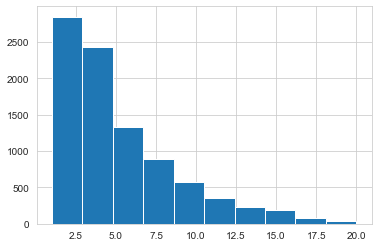

In [130]:
df.Y.hist()

In [131]:
desc = pd.read_excel('data_description.xlsx')
desc_1 = desc[(~(desc.OPIS.str.contains('3')) & (~(desc.OPIS.str.contains('6'))))]
desc_3 = desc[desc.OPIS.str.contains('3')]
desc_3 = pd.concat([desc.iloc[:2], desc_3])
desc_6 = desc[desc.OPIS.str.contains('6')]
desc_6 = pd.concat([desc.iloc[:2], desc_6])
if len(desc_1)+len(desc_3)-2+len(desc_6)-2 == len(desc):
    print('all done')

all done


In [132]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=len(X.columns)).fit((X).astype(int), y) #(10*X_train).astype(int)
feature_scoring = dict(zip(list(X.columns),list(selector.scores_)))

In [133]:
feature_scoring

{'X1': 1006.2720684820845,
 'X2': 308989.18353923806,
 'X3': 769011.7273499232,
 'X4': 1490020.6390348482,
 'X5': 256350.9307547781,
 'X6': 94.84817562308422,
 'X7': 270.0149215672048,
 'X8': 545.4833160601581,
 'X9': 16142.057820336602,
 'X10': 50630.514340601105,
 'X11': 89029.61616139584,
 'X12': 16881.065273979846,
 'X13': 67.35627588544627,
 'X14': 198.1862401340277,
 'X15': 333.15815502450033,
 'X16': 1679409.1980835362,
 'X17': 3723511.2695126436,
 'X18': 5690748.465229634,
 'X19': 1239931.3142473772,
 'X20': 426.8907386841543,
 'X21': 1055.2876485542024,
 'X22': 1827.4183931057642,
 'X23': 32939068.54663476,
 'X24': 94407442.95568568,
 'X25': 204339828.63663605,
 'X26': 31325386.966525223,
 'X27': 7013.158251110584,
 'X28': 18402.257065648202,
 'X29': 31093.54376693171,
 'X30': 4024528.580833346,
 'X31': 3435885.310705558,
 'X32': 7655545.008223157,
 'X33': 1145728.8756632733,
 'X34': 138.56365093550582,
 'X35': 326.2344748915528,
 'X36': 507.02364873006366,
 'X37': 144580.8369

In [139]:
score_value = []
feature_name = []
for i in range(1,len(list(selector.scores_))-2,3):
    print(X.columns[i]) 
    score_value.append(max(list(selector.scores_)[i], list(selector.scores_)[i+1],list(selector.scores_)[i+2]))
    feature_name.append(list(X.columns)[list(selector.scores_).index(score_value[-1])])
    print(X.columns[i+2])

X2
X4
X5
X7
X8
X10
X11
X13
X14
X16
X17
X19
X20
X22
X23
X25
X26
X28
X29
X31
X32
X34
X35
X37
X38
X40
X41
X43
X44
X46
X47
X49
X50
X52
X53
X55
X56
X58
X59
X61
X62
X64
X65
X67
X68
X70
X71
X73
X74
X76
X77
X79
X80
X82
X83
X85
X86
X88
X89
X91
X92
X94
X95
X97
X98
X100
X101
X103
X104
X106
X107
X109
X110
X112
X113
X115
X116
X118
X119
X121
X122
X124
X125
X127
X128
X130
X131
X133
X134
X136
X137
X139
X140
X142
X143
X145
X146
X148
X149
X151
X152
X154
X155
X157
X158
X160
X161
X163
X164
X166
X167
X169
X170
X172
X173
X175
X176
X178
X179
X181
X182
X184
X185
X187
X188
X190
X191
X193
X194
X196
X197
X199
X200
X202
X203
X205
X206
X208
X209
X211
X212
X214
X215
X217
X218
X220
X221
X223
X224
X226
X227
X229
X230
X232
X233
X235
X236
X238
X239
X241
X242
X244
X245
X247
X248
X250
X251
X253
X254
X256
X257
X259
X260
X262
X263
X265
X266
X268
X269
X271
X272
X274
X275
X277
X278
X280
X281
X283
X284
X286
X287
X289
X290
X292
X293
X295


In [140]:
best_feature_dict = dict(zip(feature_name, score_value))
bes

In [141]:
X.columns[-1]

'X295'